## Summary of the Solution
### Objective : Forecasting Product Level Sales for E-commerce businesses.

### Solution : Identify the best approach in forecasting Product Level sales for common e-commerce business models.

### Process to be Followed : 
1.Descriptive Analysis, EDA inferential analysis : 


2.Data Insights, Data Transformation, Data Extraction :


3.Sales Prediction:  With purchase date information we will be able to predict future sales.

## Conclusion :
The hierarchy in this dataset is the following :

There are 73 product categories and ~32K product ids in the dataset.

Each product category can have different unique product id's.

Based on this information we can use the Hierarchical Forecasting on different product category/product id level.

## Brazilian E-Commerce Public Dataset by Olist
Brazilian ecommerce public dataset of orders made at Olist Store.

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.

### Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

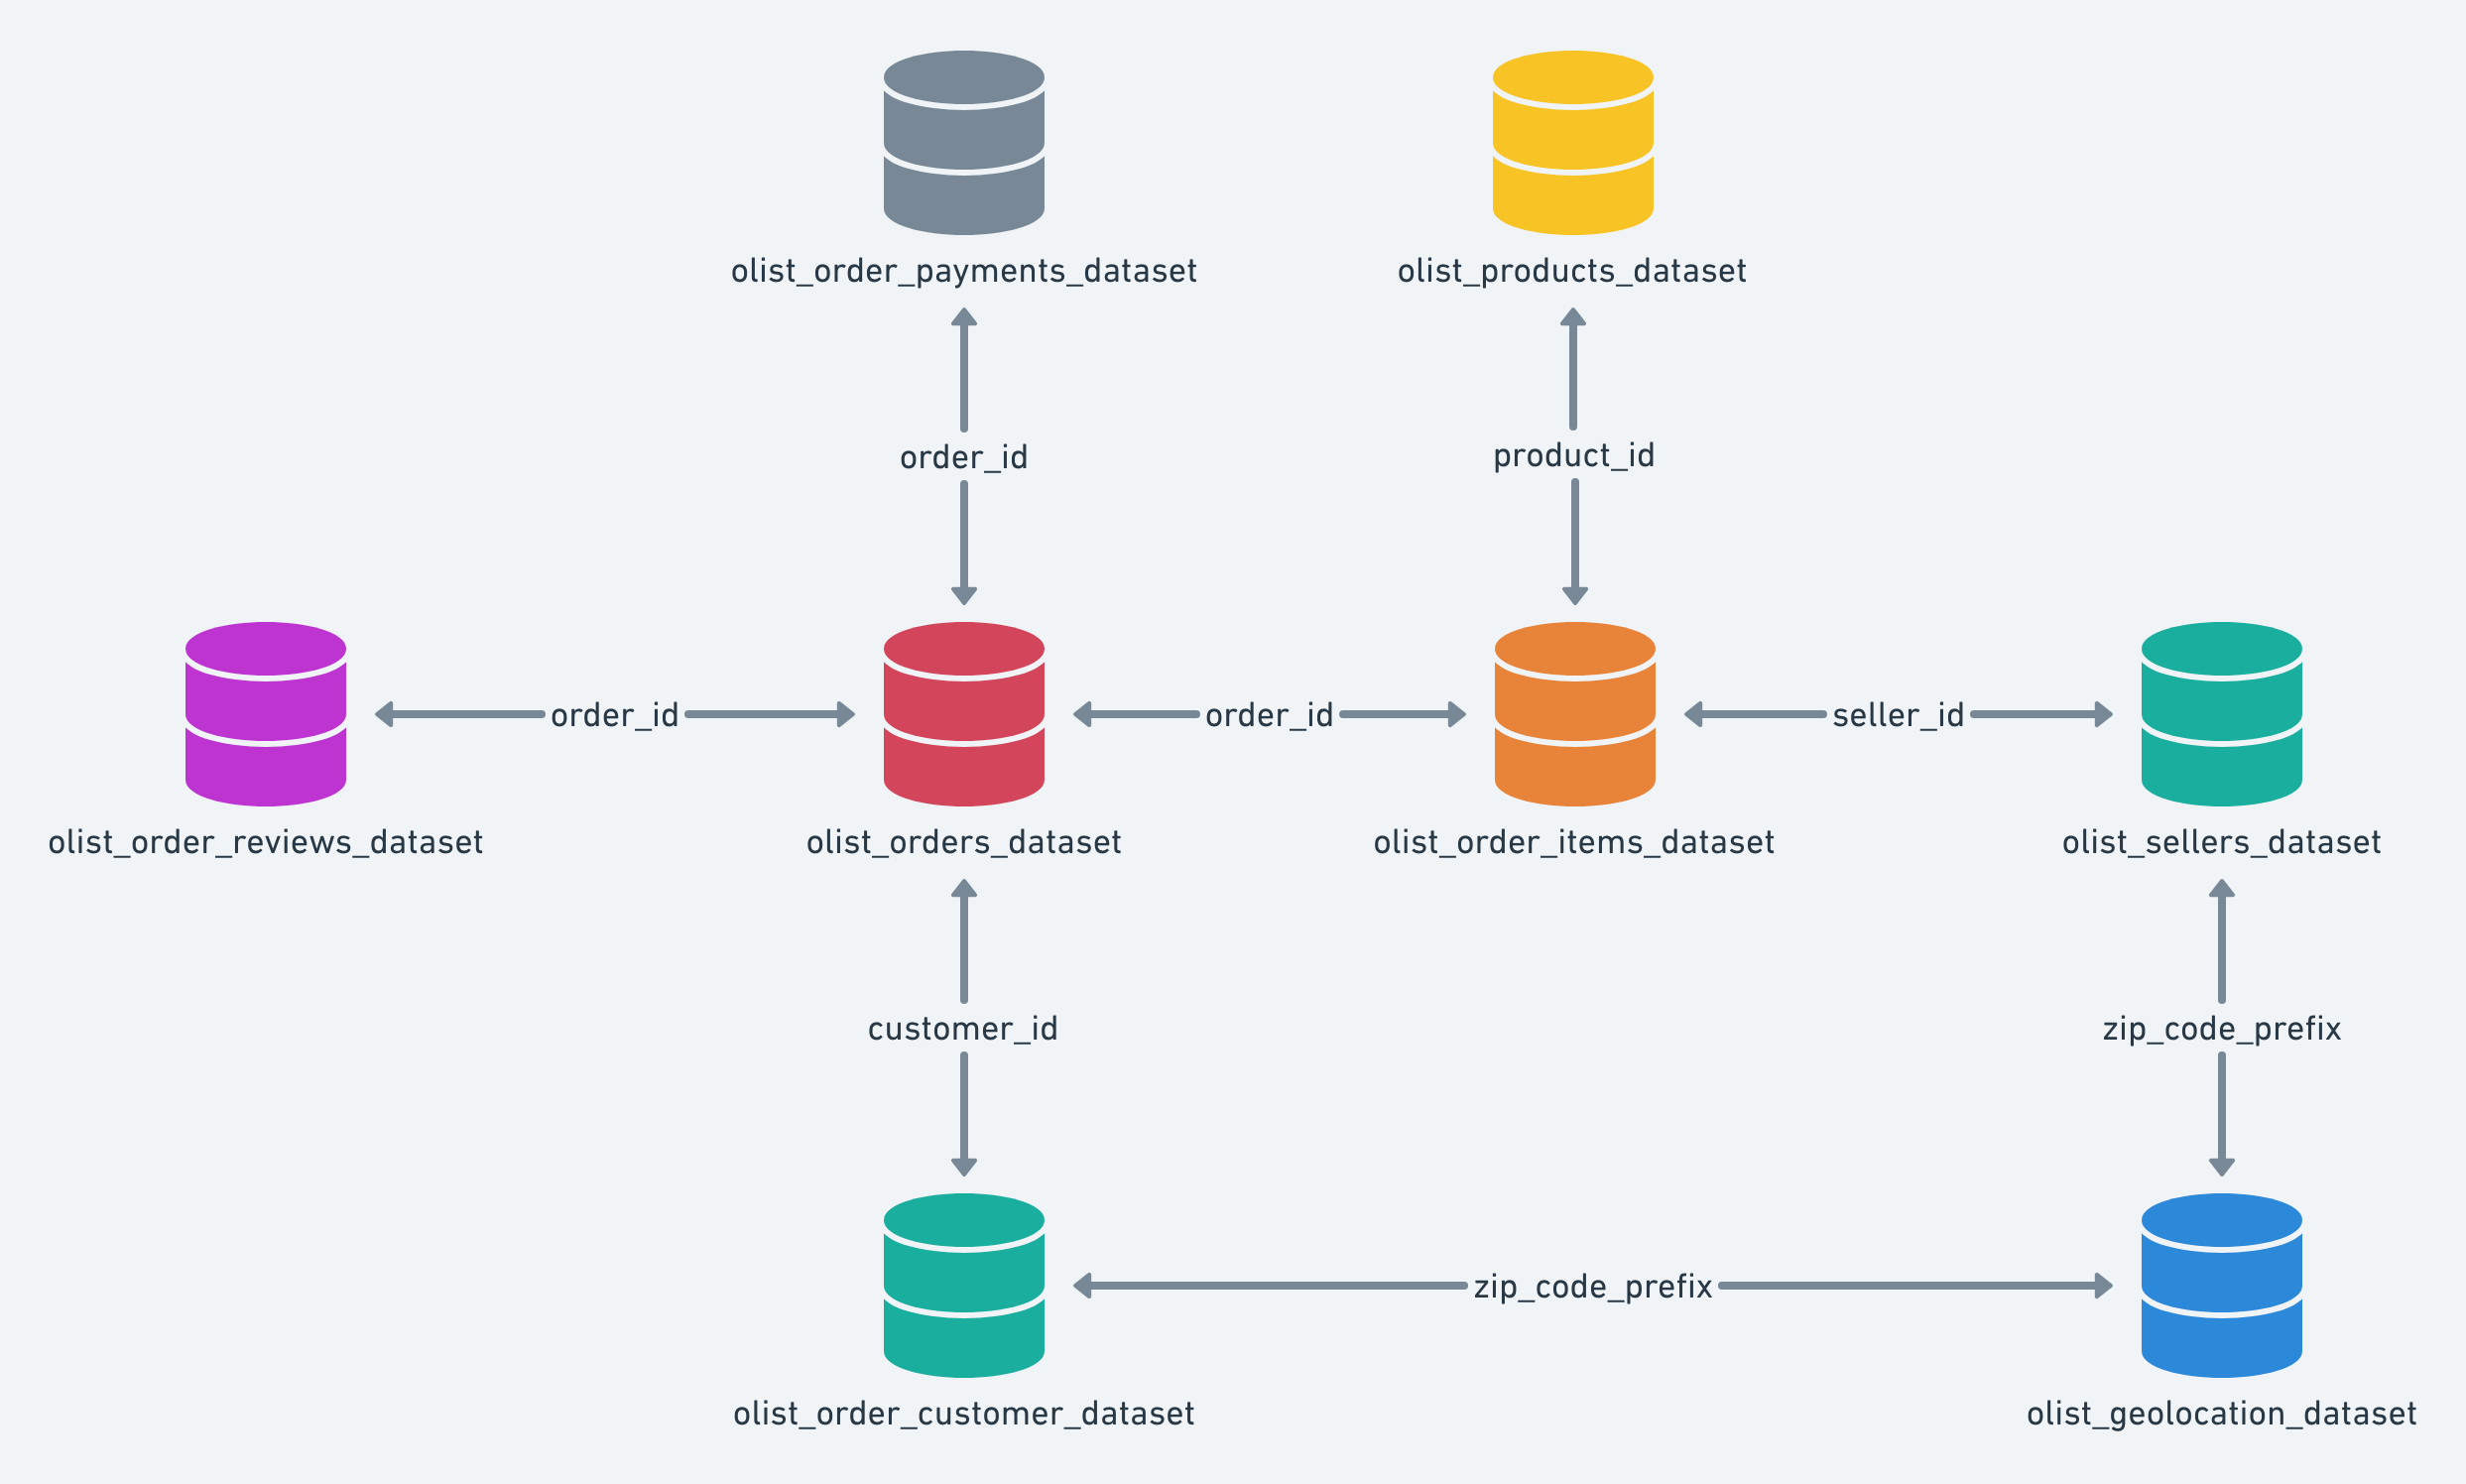




### Inspiration
#### Here are some inspiration for possible outcomes from this dataset.

#### NLP:

This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

#### Clustering:

Some customers didn't write a review. But why are they happy or mad?

#### Sales Prediction:

With purchase date information we will be able to predict future sales.

#### Delivery Performance:

You will also be able to work through delivery performance and find ways to optimize delivery times.

#### Product Quality:

Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

#### Feature Engineering:

Create features from this rich dataset or attach some external public information to it.


#### Importing the libraries

In [151]:
import os
from pprint import pprint
import importlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

from sklearn.pipeline import Pipeline
from fbprophet import Prophet

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
pwd

'C:\\Users\\Ajit Wagh\\Desktop\\TimeSeries\\Brazilian Eccomerce Dataset'

In [229]:
#read data
cust_data = pd.read_csv('olist_customers_dataset.csv')
geo_data = pd.read_csv('olist_geolocation_dataset.csv')
orders_data = pd.read_csv('olist_orders_dataset.csv')
order_item_data = pd.read_csv('olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('olist_order_reviews_dataset.csv')
product_data = pd.read_csv('olist_products_dataset.csv')
sellers_data = pd.read_csv('olist_sellers_dataset.csv')
category_data = pd.read_csv('product_category_name_translation.csv')

#### Customer Dataset

In [230]:
cust_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [231]:
cust_data.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

#### Geolocation dataset

In [232]:
geo_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Orders Dataset

In [233]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [234]:
print (orders_data.order_purchase_timestamp.min())
print (orders_data.order_purchase_timestamp.max())

2016-09-04 21:15:19
2018-10-17 17:30:18


In [235]:
orders_data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [236]:
orders_data.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

#### Order Items Dataset

In [237]:
order_item_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [238]:
order_item_data.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

#### Order Payments Dataset

In [239]:
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [240]:
order_payments_data.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

#### Order Reviews Dataset

In [241]:
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [242]:
order_reviews_data.nunique()

review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64

#### Products Dataset

In [243]:
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [244]:
product_data.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

#### Sellers Dataset

In [245]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [246]:
sellers_data.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

#### Category Dataset

In [247]:
category_data.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Merging dataframes for further analysis

In [248]:
# Merge on order_id
merged_orders = pd.merge(orders_data,order_item_data, on='order_id')
merged_orders.nunique()

order_id                         98666
customer_id                      98666
order_status                         7
order_purchase_timestamp         98112
order_approved_at                90174
order_delivered_carrier_date     81017
order_delivered_customer_date    95664
order_estimated_delivery_date      450
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
dtype: int64

In [249]:
# Merge on product_id
merged_products = pd.merge(merged_orders, product_data, on ='product_id')
merged_products.nunique()

order_id                         98666
customer_id                      98666
order_status                         7
order_purchase_timestamp         98112
order_approved_at                90174
order_delivered_carrier_date     81017
order_delivered_customer_date    95664
order_estimated_delivery_date      450
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
dtype: int64

In [250]:
#merged_products.to_csv('merged_products.csv')

In [251]:
merged_products.shape

(112650, 22)

In [252]:
merged_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [253]:
merged_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [254]:
print (merged_products.order_purchase_timestamp.min())
print (merged_products.order_purchase_timestamp.max())

2016-09-04 21:15:19
2018-09-03 09:06:57


In [255]:
merged_products.nunique()

order_id                         98666
customer_id                      98666
order_status                         7
order_purchase_timestamp         98112
order_approved_at                90174
order_delivered_carrier_date     81017
order_delivered_customer_date    95664
order_estimated_delivery_date      450
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
dtype: int64

In [288]:
merged_products.shape

(112650, 22)

In [289]:
merged_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [290]:
merged_products.count()

order_id                         112650
customer_id                      112650
order_status                     112650
order_purchase_timestamp         112650
order_approved_at                112635
order_delivered_carrier_date     111456
order_delivered_customer_date    110196
order_estimated_delivery_date    112650
order_item_id                    112650
product_id                       112650
seller_id                        112650
shipping_limit_date              112650
price                            112650
freight_value                    112650
product_category_name            111047
product_name_lenght              111047
product_description_lenght       111047
product_photos_qty               111047
product_weight_g                 112632
product_length_cm                112632
product_height_cm                112632
product_width_cm                 112632
dtype: int64

In [291]:
date_split= merged_products['order_purchase_timestamp'].str.split(' ')

In [292]:
merged_products['order_purchase_date']=date_split.str.get(0)

In [293]:
merged_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10-02
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08-15
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08-02
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10-23
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,2018-07-24


In [294]:
merged_products['order_purchase_date'] = merged_products['order_purchase_date'].str[:7]

In [295]:
merged_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,2018-07


In [296]:
merged_products1 = merged_products.groupby('order_purchase_date').agg({'count'})

In [298]:
merged_products.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_purchase_date'],
      dtype='object')

In [305]:
merged_products.to_csv('abcd.csv',index=False)

In [300]:
pwd

'C:\\Users\\Ajit Wagh\\Desktop\\TimeSeries\\Brazilian Eccomerce Dataset'

In [304]:
merged_products.groupby('order_purchase_date').size()

#### Created master file by combining orders_data,order_item_data and product_data.

#### There are 73 unique product categories and ~32k unique product id in the dataset

## EDA

In [179]:
#separate date and time of oder purchase timestamp
date_split= merged_orders['order_purchase_timestamp'].str.split(' ')

In [180]:
date_split.head()

0    [2017-10-02, 10:56:33]
1    [2018-07-24, 20:41:37]
2    [2018-08-08, 08:38:49]
3    [2017-11-18, 19:28:06]
4    [2018-02-13, 21:18:39]
Name: order_purchase_timestamp, dtype: object

In [181]:
merged_orders['order_purchase_date']=date_split.str.get(0)

In [182]:
merged_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018-02-13


In [183]:
#separete the date into day, month, year
#separate date and time, for this i need the date without time specifications
variable_split= merged_orders['order_purchase_date'].str.split('-')


merged_orders['year']=variable_split.str.get(0)
merged_orders['month']=variable_split.str.get(1)
merged_orders['day']=variable_split.str.get(2)

In [184]:
merged_orders["order_purchase_date"]= pd.to_datetime(merged_orders["order_purchase_date"])

In [185]:
merged_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_date,year,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02,2017,10,02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-24,2018,07,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08,2018,08,08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017-11-18,2017,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018-02-13,2018,02,13


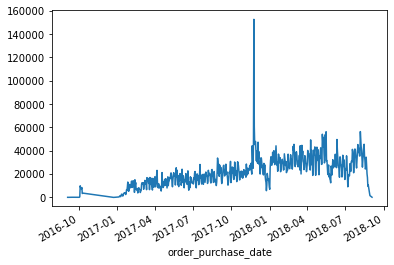

In [186]:
# Graph for total sales price over time
#Fist we will see how the sales is going over time considering the price

sales_by_time= merged_orders.groupby(["order_purchase_date"])["price"].sum().plot()

<AxesSubplot:xlabel='order_purchase_date'>

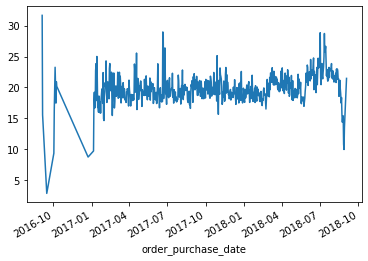

In [187]:
#graph with the freight over time, let´s see if the freight mean changed over time
merged_orders.groupby(["order_purchase_date"])["freight_value"].mean().plot()

<AxesSubplot:xlabel='month'>

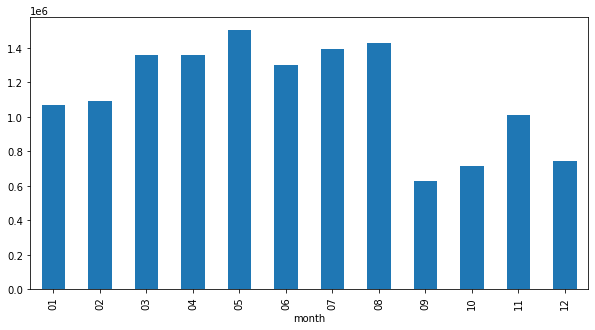

In [188]:
#Now let´s see which month presented the highest total sales considering the price
merged_orders.groupby(["month"])["price"].sum().plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='geolocation_state', ylabel='count'>

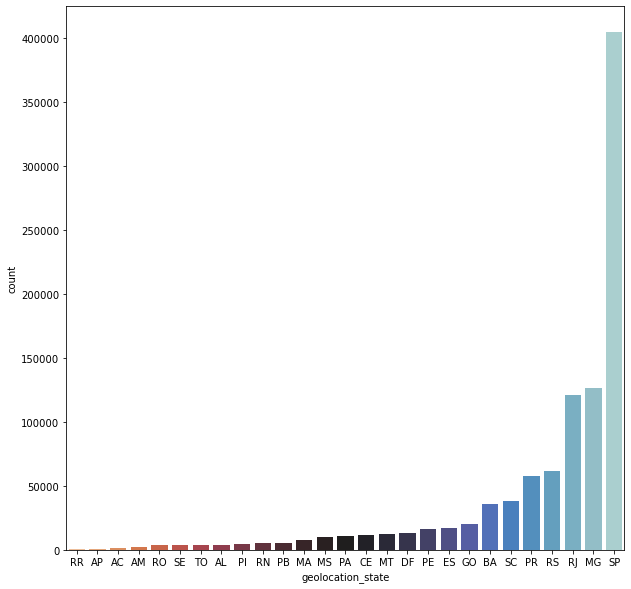

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geo_data, 
              order=geo_data['geolocation_state'].value_counts().sort_values().index, 
              palette='icefire_r')

The above graph shows the number of product orders purchased based on the states

In [190]:
# Feature Engineering with time
orders_data['order_delivered_customer_date']= orders_data['order_delivered_customer_date'].fillna(method='ffill')
orders_data['order_delivered_customer_date'].isnull().sum()

0

In [191]:
orders_data['delivered_time']=pd.to_datetime(orders_data['order_delivered_customer_date'],
                                            format='%Y-%m-%d').dt.date
orders_data['estimate_time']=pd.to_datetime(orders_data['order_estimated_delivery_date'], 
                                           format='%Y-%m-%d').dt.date

## Customer Top 10 Products

In [192]:
merged_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [193]:
len(merged_products['product_id'].unique())

32951

In [194]:
len(merged_products['product_id'].str[-8:].unique())

32951

In [195]:
merged_products['product_id_shorten']=merged_products['product_id'].str[-8:]

Text(0.5, 1.0, 'Top 10 Products')

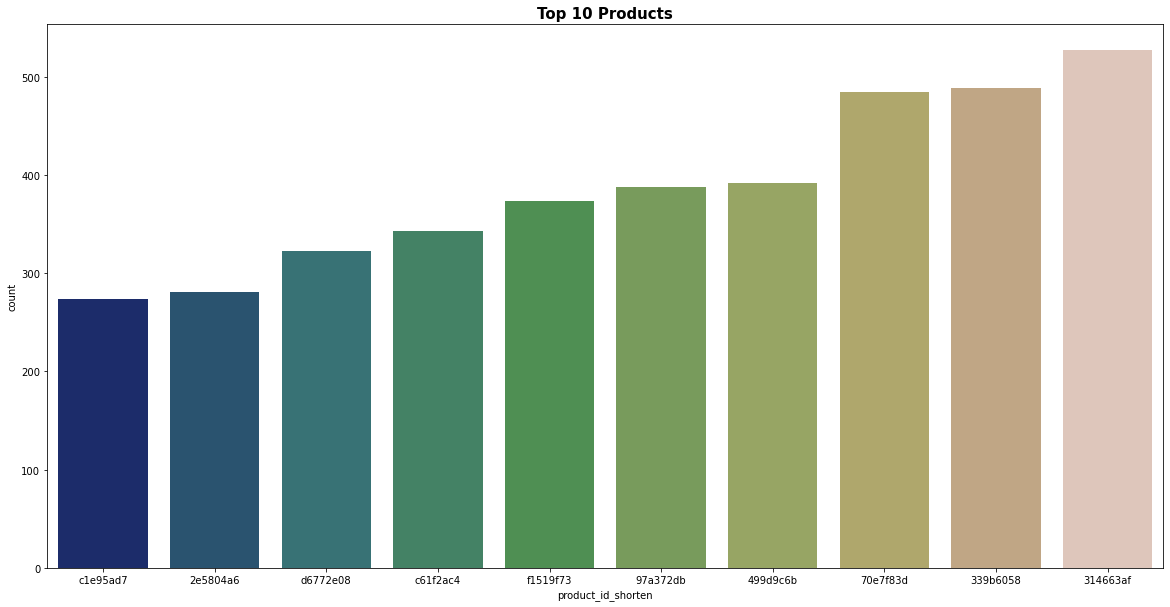

In [196]:
#Plotting Top 10 Products
plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=merged_products, palette='gist_earth',
             order=merged_products['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

In [197]:
merged_products.nunique()

order_id                         98666
customer_id                      98666
order_status                         7
order_purchase_timestamp         98112
order_approved_at                90174
order_delivered_carrier_date     81017
order_delivered_customer_date    95664
order_estimated_delivery_date      450
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
product_id_shorten               32951
dtype: int64

## Top 10 Seller

In [198]:
seller_products = pd.merge(order_item_data, sellers_data, on="seller_id")
seller_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                112650 non-null  object 
 1   order_item_id           112650 non-null  int64  
 2   product_id              112650 non-null  object 
 3   seller_id               112650 non-null  object 
 4   shipping_limit_date     112650 non-null  object 
 5   price                   112650 non-null  float64
 6   freight_value           112650 non-null  float64
 7   seller_zip_code_prefix  112650 non-null  int64  
 8   seller_city             112650 non-null  object 
 9   seller_state            112650 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 9.5+ MB


In [199]:
seller_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,27277,volta redonda,SP


In [200]:
seller_products.nunique()

order_id                  98666
order_item_id                21
product_id                32951
seller_id                  3095
shipping_limit_date       93318
price                      5968
freight_value              6999
seller_zip_code_prefix     2246
seller_city                 611
seller_state                 23
dtype: int64

In [201]:
len(seller_products['seller_id'].unique())

3095

In [202]:
len(seller_products['seller_id'].str[-6:].unique())

3095

In [203]:
seller_products['seller_id_shorten']=seller_products['seller_id'].str[-6:]

Text(0.5, 1.0, 'Top 10 Seller')

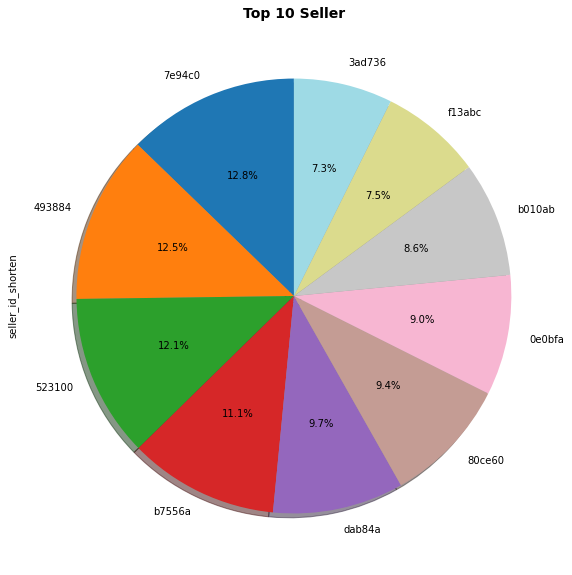

In [204]:
plt.figure(figsize=(20,10))
seller_products['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

In [205]:
# First creating new feature of weeks
merged_products['order_week']= pd.to_datetime(merged_products['order_purchase_timestamp'],
                                            format='%Y-%m-%d').dt.week

C:\Users\Ajit Wagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weekly Purchased Number of `314663af`')

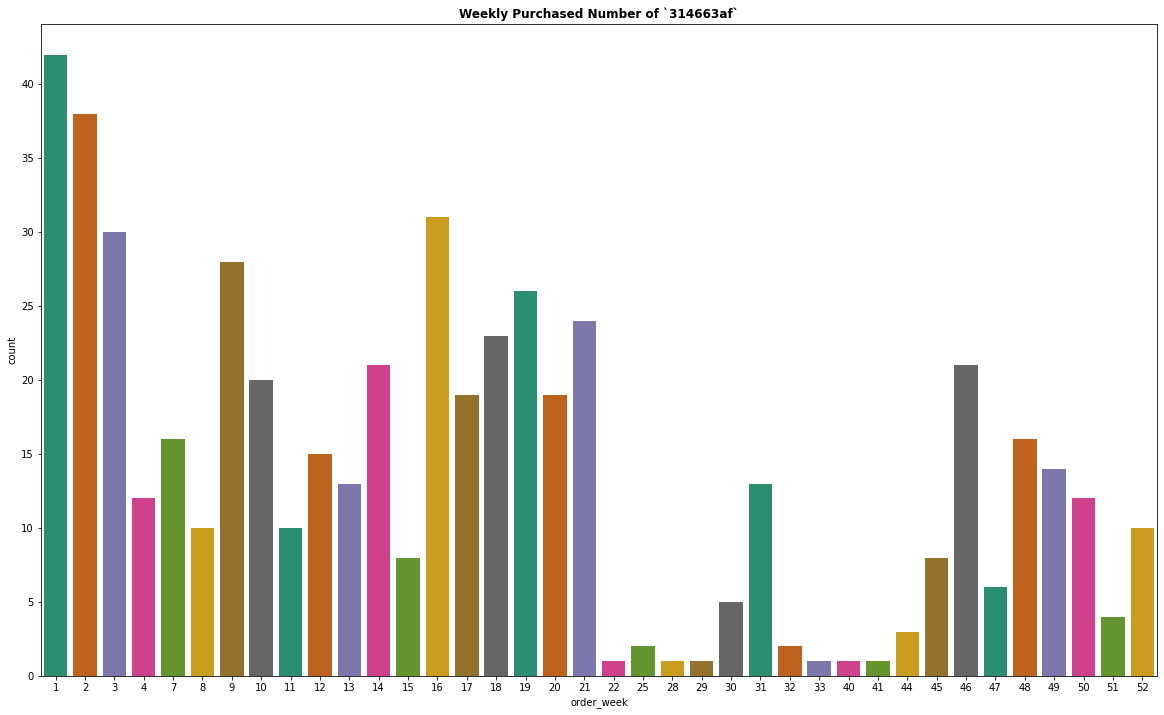

In [206]:
plt.figure(figsize=(20,12))
sns.countplot('order_week', data=merged_products[merged_products['product_id_shorten']== 
                                        '314663af'], palette='Dark2', linewidth=5)\
                                        .set_title('Weekly Purchased Number of `314663af`'
                                                   ,fontweight='bold')

In [207]:
merged_products.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_id_shorten',
       'order_week'],
      dtype='object')

In [208]:
date_split1= merged_products['order_purchase_timestamp'].str.split(' ')
merged_products['order_purchase_date']=date_split.str.get(0)

In [209]:
forecast = merged_products[['order_purchase_date','product_category_name','product_id_shorten','price']]

In [226]:
merged_products.shape

(112650, 25)

In [228]:
merged_products.to_csv("C://Users//Ajit Wagh//Desktop//TimeSeries//new_categories//merged_data.csv", index= False)

In [211]:
forecast.shape

(112650, 4)

In [212]:
forecast.head(5)

,order_purchase_date,product_category_name,product_id_shorten,price
0,2017-10-02,utilidades_domesticas,c7ac498a,29.99
1,2018-07-24,utilidades_domesticas,c7ac498a,29.99
2,2018-08-08,utilidades_domesticas,c7ac498a,29.99
3,2017-11-18,utilidades_domesticas,c7ac498a,29.99
4,2018-02-13,perfumaria,aec74eb8,118.70


In [213]:
forecast["product_category_id"] = forecast.apply(lambda x: f"{x['product_category_name']}_{x['product_id_shorten']}", axis=1)

In [220]:
forecast.head()

,order_purchase_date,product_category_name,product_id_shorten,price,product_category_id
0,2017-10-02,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
1,2018-07-24,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
2,2018-08-08,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
3,2017-11-18,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
4,2018-02-13,perfumaria,aec74eb8,118.70,perfumaria_aec74eb8


In [215]:
forecast.shape

(112650, 5)

## Visualizing the Tree Structure 
Let's create a simple plot of our tree structure so we can develop a better understanding of our dataset. We will use networkx and plotly to produce the visualization, so we need to create a list of tuples for each connection.

In [78]:
grouped_sections = forecast1.groupby(["product_category_name", "product_category_id"])
edges_hierarchy = list(grouped_sections.groups.keys())
#edges_hierarchy[:7]

In [79]:
edges_hierarchy

[('utilidades_domesticas', 'utilidades_domesticas_c7ac498a'),
 ('perfumaria', 'perfumaria_aec74eb8'),
 ('automotivo', 'automotivo_e5594415'),
 ('pet_shop', 'pet_shop_ca96e5b0'),
 ('papelaria', 'papelaria_3bb7859e'),
 ('automotivo', 'automotivo_193c233d'),
 (nan, 'nan_9f5206eb'),
 ('automotivo', 'automotivo_8a18c464'),
 ('moveis_decoracao', 'moveis_decoracao_a671243a'),
 ('moveis_escritorio', 'moveis_escritorio_3c31f051'),
 ('ferramentas_jardim', 'ferramentas_jardim_1b152b4e'),
 ('informatica_acessorios', 'informatica_acessorios_bc1fff76'),
 ('perfumaria', 'perfumaria_b93ae530'),
 ('cama_mesa_banho', 'cama_mesa_banho_cb68d777'),
 ('brinquedos', 'brinquedos_860e3eff'),
 ('perfumaria', 'perfumaria_186dce73'),
 ('construcao_ferramentas_construcao',
  'construcao_ferramentas_construcao_febfd672'),
 ('telefonia', 'telefonia_b26e40a5'),
 ('cama_mesa_banho', 'cama_mesa_banho_fd29e9cd'),
 ('telefonia', 'telefonia_50c3fd22'),
 ('beleza_saude', 'beleza_saude_046f75dc'),
 ('beleza_saude', 'beleza_

In [80]:
second_level_nodes = ["NSW", "OTH", "WAU", "SAU", "QLD", "VIC"]
root_node = "total"

root_edges = [(root_node, second_level_node) for second_level_node in second_level_nodes]
root_edges

[('total', 'NSW'),
 ('total', 'OTH'),
 ('total', 'WAU'),
 ('total', 'SAU'),
 ('total', 'QLD'),
 ('total', 'VIC')]

In [81]:
forecast1.shape

(112650, 5)

In [82]:
forecast2 = forecast1.dropna()

In [83]:
forecast2.head()

,order_purchase_date,product_category_name,product_id_shorten,price,product_category_id
0,2017-10-02,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
1,2018-07-24,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
2,2018-08-08,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
3,2017-11-18,utilidades_domesticas,c7ac498a,29.99,utilidades_domesticas_c7ac498a
4,2018-02-13,perfumaria,aec74eb8,118.70,perfumaria_aec74eb8


In [88]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [89]:
a = forecast2['product_category_name'].unique()

In [90]:
a

array(['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer',
       'livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'artigos_de_natal', 'fashion_bolsas_e_acessorios',
       'instrumentos_musicais', 'construcao_ferramentas_iluminacao',
       'livros_tecnicos', 'construcao_ferramentas_jardim',
       'eletrodomesticos', 'market_place', 'agro_industria_e_comercio',
       'artigos_de_festas', 'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas',
  

In [91]:
a.shape

(73,)

In [92]:
second_level_nodes = ['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer',
       'livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'artigos_de_natal', 'fashion_bolsas_e_acessorios',
       'instrumentos_musicais', 'construcao_ferramentas_iluminacao',
       'livros_tecnicos', 'construcao_ferramentas_jardim',
       'eletrodomesticos', 'market_place', 'agro_industria_e_comercio',
       'artigos_de_festas', 'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'fashion_calcados', 'casa_construcao', 'audio',
       'eletrodomesticos_2', 'fashion_roupa_masculina', 'cine_foto',
       'moveis_sala', 'artes', 'alimentos_bebidas',
       'tablets_impressao_imagem', 'fashion_esporte',
       'portateis_cozinha_e_preparadores_de_alimentos', 'la_cuisine',
       'flores', 'pcs', 'casa_conforto_2', 'portateis_casa_forno_e_cafe',
       'dvds_blu_ray', 'pc_gamer', 'construcao_ferramentas_ferramentas',
       'fashion_roupa_feminina', 'moveis_colchao_e_estofado',
       'sinalizacao_e_seguranca', 'fraldas_higiene', 'livros_importados',
       'fashion_roupa_infanto_juvenil', 'musica', 'artes_e_artesanato',
       'seguros_e_servicos']
root_node = "total"

root_edges = [(root_node, second_level_node) for second_level_node in second_level_nodes]
root_edges

[('total', 'utilidades_domesticas'),
 ('total', 'perfumaria'),
 ('total', 'automotivo'),
 ('total', 'pet_shop'),
 ('total', 'papelaria'),
 ('total', 'moveis_decoracao'),
 ('total', 'moveis_escritorio'),
 ('total', 'ferramentas_jardim'),
 ('total', 'informatica_acessorios'),
 ('total', 'cama_mesa_banho'),
 ('total', 'brinquedos'),
 ('total', 'construcao_ferramentas_construcao'),
 ('total', 'telefonia'),
 ('total', 'beleza_saude'),
 ('total', 'eletronicos'),
 ('total', 'bebes'),
 ('total', 'cool_stuff'),
 ('total', 'relogios_presentes'),
 ('total', 'climatizacao'),
 ('total', 'esporte_lazer'),
 ('total', 'livros_interesse_geral'),
 ('total', 'eletroportateis'),
 ('total', 'alimentos'),
 ('total', 'malas_acessorios'),
 ('total', 'fashion_underwear_e_moda_praia'),
 ('total', 'artigos_de_natal'),
 ('total', 'fashion_bolsas_e_acessorios'),
 ('total', 'instrumentos_musicais'),
 ('total', 'construcao_ferramentas_iluminacao'),
 ('total', 'livros_tecnicos'),
 ('total', 'construcao_ferramentas_ja

In [93]:
root_edges += edges_hierarchy

## Transform data in the format required by scikit-hts

In [94]:
forecast2.columns

Index(['order_purchase_date', 'product_category_name', 'product_id_shorten',
       'price', 'product_category_id'],
      dtype='object')

In [95]:
forecast2.nunique()

order_purchase_date        616
product_category_name       73
product_id_shorten       32341
price                     5902
product_category_id      32341
dtype: int64

In [96]:
forecast3 = forecast2.groupby(['order_purchase_date', 'product_category_name', 'product_category_id'], as_index=False).agg({'price':sum})

In [97]:
forecast3.shape

(98452, 4)

In [98]:
type(forecast3)

pandas.core.frame.DataFrame

In [99]:
forecast3.head().reset_index(drop=True)

,order_purchase_date,product_category_name,product_category_id,price
0,2016-09-04,cama_mesa_banho,cama_mesa_banho_405ca522,283.80
1,2016-09-05,ferramentas_jardim,ferramentas_jardim_499d9c6b,49.90
2,2016-09-15,moveis_decoracao,moveis_decoracao_6cce1efc,105.00
3,2016-10-02,moveis_decoracao,moveis_decoracao_e44ae544,109.99
4,2016-10-03,automotivo,automotivo_8772d5ab,169.99


In [100]:
forecast3.shape

(98452, 4)

In [101]:
forec = forecast3

In [102]:
forec

,order_purchase_date,product_category_name,product_category_id,price
0,2016-09-04,cama_mesa_banho,cama_mesa_banho_405ca522,283.80
1,2016-09-05,ferramentas_jardim,ferramentas_jardim_499d9c6b,49.90
2,2016-09-15,moveis_decoracao,moveis_decoracao_6cce1efc,105.00
3,2016-10-02,moveis_decoracao,moveis_decoracao_e44ae544,109.99
4,2016-10-03,automotivo,automotivo_8772d5ab,169.99
...,...,...,...,...
98447,2018-08-29,instrumentos_musicais,instrumentos_musicais_1015ec27,70.00
98448,2018-08-29,moveis_decoracao,moveis_decoracao_d2c749ab,119.00
98449,2018-08-29,relogios_presentes,relogios_presentes_7548f79b,1109.00
98450,2018-08-29,utilidades_domesticas,utilidades_domesticas_f59d1751,180.00


In [103]:
forec.shape

(98452, 4)

In [104]:
forecast3.reset_index(drop=True, inplace=True)

In [122]:
forecast3.head()

,order_purchase_date,product_category_name,product_category_id,price
0,2016-09-04,cama_mesa_banho,cama_mesa_banho_405ca522,283.80
1,2016-09-05,ferramentas_jardim,ferramentas_jardim_499d9c6b,49.90
2,2016-09-15,moveis_decoracao,moveis_decoracao_6cce1efc,105.00
3,2016-10-02,moveis_decoracao,moveis_decoracao_e44ae544,109.99
4,2016-10-03,automotivo,automotivo_8772d5ab,169.99


In [105]:
forecast_bottom_level = forec.pivot(index="order_purchase_date", columns="product_category_id", values="price")
forecast_bottom_level.head(5)

product_category_id,agro_industria_e_comercio_01d8e4d4,agro_industria_e_comercio_01e24348,agro_industria_e_comercio_037f61ea,agro_industria_e_comercio_06a3645c,agro_industria_e_comercio_0ad25bf9,agro_industria_e_comercio_0b5abfb7,agro_industria_e_comercio_0c047701,agro_industria_e_comercio_1b7acb84,agro_industria_e_comercio_1bc5c72d,agro_industria_e_comercio_1daba91c,agro_industria_e_comercio_1e3145ad,agro_industria_e_comercio_23305bac,agro_industria_e_comercio_2a7b79fd,agro_industria_e_comercio_2aa50011,agro_industria_e_comercio_2bec56e9,agro_industria_e_comercio_2cd36593,agro_industria_e_comercio_30155a6a,agro_industria_e_comercio_3194bb19,agro_industria_e_comercio_34122aed,agro_industria_e_comercio_34e00d99,agro_industria_e_comercio_370cf1ed,agro_industria_e_comercio_3a79a453,agro_industria_e_comercio_3ae2ed83,agro_industria_e_comercio_3c688048,agro_industria_e_comercio_40b3971c,agro_industria_e_comercio_40e784e5,agro_industria_e_comercio_4199db2d,agro_industria_e_comercio_45b6d6ed,agro_industria_e_comercio_4643e054,agro_industria_e_comercio_49a5a7b5,agro_industria_e_comercio_4d75b1bf,agro_industria_e_comercio_4ed9e06c,agro_industria_e_comercio_50f572f3,agro_industria_e_comercio_549a6160,agro_industria_e_comercio_59404cb1,agro_industria_e_comercio_5b04144c,agro_industria_e_comercio_5bbb26ae,agro_industria_e_comercio_5f578ba0,agro_industria_e_comercio_6614f140,agro_industria_e_comercio_69db9863,agro_industria_e_comercio_6e4341d4,agro_industria_e_comercio_7a0ad991,agro_industria_e_comercio_7f794727,agro_industria_e_comercio_8289d762,agro_industria_e_comercio_83836484,agro_industria_e_comercio_8cd77f44,agro_industria_e_comercio_8df75602,agro_industria_e_comercio_8f1b57f0,agro_industria_e_comercio_91003690,agro_industria_e_comercio_99368b54,...,utilidades_domesticas_fac940f7,utilidades_domesticas_fadb9473,utilidades_domesticas_faf0ae04,utilidades_domesticas_faf17cf6,utilidades_domesticas_fb04f487,utilidades_domesticas_fb317683,utilidades_domesticas_fb4109a3,utilidades_domesticas_fb568cf2,utilidades_domesticas_fb59604b,utilidades_domesticas_fb846cbc,utilidades_domesticas_fb9730a2,utilidades_domesticas_fbb5932e,utilidades_domesticas_fbe8c43a,utilidades_domesticas_fc1cfe02,utilidades_domesticas_fc2d904c,utilidades_domesticas_fc445f81,utilidades_domesticas_fcb2d18a,utilidades_domesticas_fcc6781c,utilidades_domesticas_fcd2600e,utilidades_domesticas_fcda6286,utilidades_domesticas_fce29e3e,utilidades_domesticas_fd2944d1,utilidades_domesticas_fd358b49,utilidades_domesticas_fd7028fd,utilidades_domesticas_fd72517c,utilidades_domesticas_fd994016,utilidades_domesticas_fd9c4162,utilidades_domesticas_fd9ff224,utilidades_domesticas_fdc65e2c,utilidades_domesticas_fde3917f,utilidades_domesticas_fde9d018,utilidades_domesticas_fdec44b8,utilidades_domesticas_fe1d74bb,utilidades_domesticas_fe433071,utilidades_domesticas_fe58d65b,utilidades_domesticas_fe61807c,utilidades_domesticas_fe6de326,utilidades_domesticas_febc05b0,utilidades_domesticas_fef72744,utilidades_domesticas_ff0cb5de,utilidades_domesticas_ff50911d,utilidades_domesticas_ff585ac4,utilidades_domesticas_ff6042c8,utilidades_domesticas_ff623fba,utilidades_domesticas_ff8df0d9,utilidades_domesticas_ff973a61,utilidades_domesticas_ffa77540,utilidades_domesticas_ffc9ce6b,utilidades_domesticas_ffe4a851,utilidades_domesticas_fff68671
order_purchase_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [106]:
forecast_bottom_level = forec.pivot("order_purchase_date", "product_category_id", "price")
forecast_bottom_level.tail(5)

product_category_id,agro_industria_e_comercio_01d8e4d4,agro_industria_e_comercio_01e24348,agro_industria_e_comercio_037f61ea,agro_industria_e_comercio_06a3645c,agro_industria_e_comercio_0ad25bf9,agro_industria_e_comercio_0b5abfb7,agro_industria_e_comercio_0c047701,agro_industria_e_comercio_1b7acb84,agro_industria_e_comercio_1bc5c72d,agro_industria_e_comercio_1daba91c,agro_industria_e_comercio_1e3145ad,agro_industria_e_comercio_23305bac,agro_industria_e_comercio_2a7b79fd,agro_industria_e_comercio_2aa50011,agro_industria_e_comercio_2bec56e9,agro_industria_e_comercio_2cd36593,agro_industria_e_comercio_30155a6a,agro_industria_e_comercio_3194bb19,agro_industria_e_comercio_34122aed,agro_industria_e_comercio_34e00d99,agro_industria_e_comercio_370cf1ed,agro_industria_e_comercio_3a79a453,agro_industria_e_comercio_3ae2ed83,agro_industria_e_comercio_3c688048,agro_industria_e_comercio_40b3971c,agro_industria_e_comercio_40e784e5,agro_industria_e_comercio_4199db2d,agro_industria_e_comercio_45b6d6ed,agro_industria_e_comercio_4643e054,agro_industria_e_comercio_49a5a7b5,agro_industria_e_comercio_4d75b1bf,agro_industria_e_comercio_4ed9e06c,agro_industria_e_comercio_50f572f3,agro_industria_e_comercio_549a6160,agro_industria_e_comercio_59404cb1,agro_industria_e_comercio_5b04144c,agro_industria_e_comercio_5bbb26ae,agro_industria_e_comercio_5f578ba0,agro_industria_e_comercio_6614f140,agro_industria_e_comercio_69db9863,agro_industria_e_comercio_6e4341d4,agro_industria_e_comercio_7a0ad991,agro_industria_e_comercio_7f794727,agro_industria_e_comercio_8289d762,agro_industria_e_comercio_83836484,agro_industria_e_comercio_8cd77f44,agro_industria_e_comercio_8df75602,agro_industria_e_comercio_8f1b57f0,agro_industria_e_comercio_91003690,agro_industria_e_comercio_99368b54,...,utilidades_domesticas_fac940f7,utilidades_domesticas_fadb9473,utilidades_domesticas_faf0ae04,utilidades_domesticas_faf17cf6,utilidades_domesticas_fb04f487,utilidades_domesticas_fb317683,utilidades_domesticas_fb4109a3,utilidades_domesticas_fb568cf2,utilidades_domesticas_fb59604b,utilidades_domesticas_fb846cbc,utilidades_domesticas_fb9730a2,utilidades_domesticas_fbb5932e,utilidades_domesticas_fbe8c43a,utilidades_domesticas_fc1cfe02,utilidades_domesticas_fc2d904c,utilidades_domesticas_fc445f81,utilidades_domesticas_fcb2d18a,utilidades_domesticas_fcc6781c,utilidades_domesticas_fcd2600e,utilidades_domesticas_fcda6286,utilidades_domesticas_fce29e3e,utilidades_domesticas_fd2944d1,utilidades_domesticas_fd358b49,utilidades_domesticas_fd7028fd,utilidades_domesticas_fd72517c,utilidades_domesticas_fd994016,utilidades_domesticas_fd9c4162,utilidades_domesticas_fd9ff224,utilidades_domesticas_fdc65e2c,utilidades_domesticas_fde3917f,utilidades_domesticas_fde9d018,utilidades_domesticas_fdec44b8,utilidades_domesticas_fe1d74bb,utilidades_domesticas_fe433071,utilidades_domesticas_fe58d65b,utilidades_domesticas_fe61807c,utilidades_domesticas_fe6de326,utilidades_domesticas_febc05b0,utilidades_domesticas_fef72744,utilidades_domesticas_ff0cb5de,utilidades_domesticas_ff50911d,utilidades_domesticas_ff585ac4,utilidades_domesticas_ff6042c8,utilidades_domesticas_ff623fba,utilidades_domesticas_ff8df0d9,utilidades_domesticas_ff973a61,utilidades_domesticas_ffa77540,utilidades_domesticas_ffc9ce6b,utilidades_domesticas_ffe4a851,utilidades_domesticas_fff68671
order_purchase_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [107]:
forec.nunique()

order_purchase_date        616
product_category_name       73
product_category_id      32341
price                     7853
dtype: int64

In [108]:
print(forec['order_purchase_date'].min())
print(forec['order_purchase_date'].max())

2016-09-04
2018-09-03


In [109]:
forecast_bottom_level = pd.pivot_table(forecast3, index="order_purchase_date", columns="product_category_id", values="price")

In [110]:
forecast_bottom_level

product_category_id,agro_industria_e_comercio_01d8e4d4,agro_industria_e_comercio_01e24348,agro_industria_e_comercio_037f61ea,agro_industria_e_comercio_06a3645c,agro_industria_e_comercio_0ad25bf9,agro_industria_e_comercio_0b5abfb7,agro_industria_e_comercio_0c047701,agro_industria_e_comercio_1b7acb84,agro_industria_e_comercio_1bc5c72d,agro_industria_e_comercio_1daba91c,agro_industria_e_comercio_1e3145ad,agro_industria_e_comercio_23305bac,agro_industria_e_comercio_2a7b79fd,agro_industria_e_comercio_2aa50011,agro_industria_e_comercio_2bec56e9,agro_industria_e_comercio_2cd36593,agro_industria_e_comercio_30155a6a,agro_industria_e_comercio_3194bb19,agro_industria_e_comercio_34122aed,agro_industria_e_comercio_34e00d99,agro_industria_e_comercio_370cf1ed,agro_industria_e_comercio_3a79a453,agro_industria_e_comercio_3ae2ed83,agro_industria_e_comercio_3c688048,agro_industria_e_comercio_40b3971c,agro_industria_e_comercio_40e784e5,agro_industria_e_comercio_4199db2d,agro_industria_e_comercio_45b6d6ed,agro_industria_e_comercio_4643e054,agro_industria_e_comercio_49a5a7b5,agro_industria_e_comercio_4d75b1bf,agro_industria_e_comercio_4ed9e06c,agro_industria_e_comercio_50f572f3,agro_industria_e_comercio_549a6160,agro_industria_e_comercio_59404cb1,agro_industria_e_comercio_5b04144c,agro_industria_e_comercio_5bbb26ae,agro_industria_e_comercio_5f578ba0,agro_industria_e_comercio_6614f140,agro_industria_e_comercio_69db9863,agro_industria_e_comercio_6e4341d4,agro_industria_e_comercio_7a0ad991,agro_industria_e_comercio_7f794727,agro_industria_e_comercio_8289d762,agro_industria_e_comercio_83836484,agro_industria_e_comercio_8cd77f44,agro_industria_e_comercio_8df75602,agro_industria_e_comercio_8f1b57f0,agro_industria_e_comercio_91003690,agro_industria_e_comercio_99368b54,...,utilidades_domesticas_fac940f7,utilidades_domesticas_fadb9473,utilidades_domesticas_faf0ae04,utilidades_domesticas_faf17cf6,utilidades_domesticas_fb04f487,utilidades_domesticas_fb317683,utilidades_domesticas_fb4109a3,utilidades_domesticas_fb568cf2,utilidades_domesticas_fb59604b,utilidades_domesticas_fb846cbc,utilidades_domesticas_fb9730a2,utilidades_domesticas_fbb5932e,utilidades_domesticas_fbe8c43a,utilidades_domesticas_fc1cfe02,utilidades_domesticas_fc2d904c,utilidades_domesticas_fc445f81,utilidades_domesticas_fcb2d18a,utilidades_domesticas_fcc6781c,utilidades_domesticas_fcd2600e,utilidades_domesticas_fcda6286,utilidades_domesticas_fce29e3e,utilidades_domesticas_fd2944d1,utilidades_domesticas_fd358b49,utilidades_domesticas_fd7028fd,utilidades_domesticas_fd72517c,utilidades_domesticas_fd994016,utilidades_domesticas_fd9c4162,utilidades_domesticas_fd9ff224,utilidades_domesticas_fdc65e2c,utilidades_domesticas_fde3917f,utilidades_domesticas_fde9d018,utilidades_domesticas_fdec44b8,utilidades_domesticas_fe1d74bb,utilidades_domesticas_fe433071,utilidades_domesticas_fe58d65b,utilidades_domesticas_fe61807c,utilidades_domesticas_fe6de326,utilidades_domesticas_febc05b0,utilidades_domesticas_fef72744,utilidades_domesticas_ff0cb5de,utilidades_domesticas_ff50911d,utilidades_domesticas_ff585ac4,utilidades_domesticas_ff6042c8,utilidades_domesticas_ff623fba,utilidades_domesticas_ff8df0d9,utilidades_domesticas_ff973a61,utilidades_domesticas_ffa77540,utilidades_domesticas_ffc9ce6b,utilidades_domesticas_ffe4a851,utilidades_domesticas_fff68671
order_purchase_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [112]:
forec.columns

Index(['order_purchase_date', 'product_category_name', 'product_category_id',
       'price'],
      dtype='object')

In [113]:
forec['product_category_id'].nunique()

32341

In [114]:
forec.columns

Index(['order_purchase_date', 'product_category_name', 'product_category_id',
       'price'],
      dtype='object')